In [1]:
## Deconvolution into discrete subpopulations using a general mixture model (GMM)

## Imports and variables

import numpy as np
import glob
import os
import importDeconvolutionGMM
from tqdm import tqdm
from pathlib import Path

BayesMat={} # Dictionary with all the Bayes struct per cell
numDist = 3 # Choose maximum number of distributions

pathBayesCells='OutputBayes/'
pathBayesCells='/projects/hidpy/output2/u2os-h2bgfp-serum-3/ex'
parameters2decon=['D','A','V']
nbins=50

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
## Deconvolution GMM

listdir=glob.glob(pathBayesCells+'*.pickle')  # Read cell pickle files

BayesMat=importDeconvolutionGMM.applyGMM_Multiple(listdir,parameters2decon,numDist) # Apply GMM

pathBayesCells_GMM_Multiple='OutputBayes/GMM_Multiple/'

try: 
    os.mkdir(pathBayesCells_GMM_Multiple)
except: 
    print('WARNING: The output path [%s] exists' %pathBayesCells_GMM_Multiple)
    [f.unlink() for f in Path(pathBayesCells_GMM_Multiple).glob("*") if f.is_file()] 

importDeconvolutionGMM.generatetable_TestGMM(pathBayesCells_GMM_Multiple,BayesMat,parameters2decon) # Make Table

0it [00:00, ?it/s]


ValueError: max() arg is an empty sequence

100%|██████████| 5/5 [00:01<00:00,  3.67it/s]


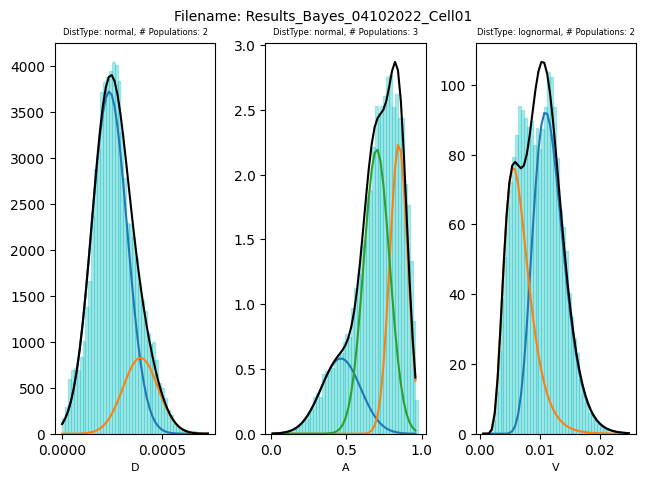

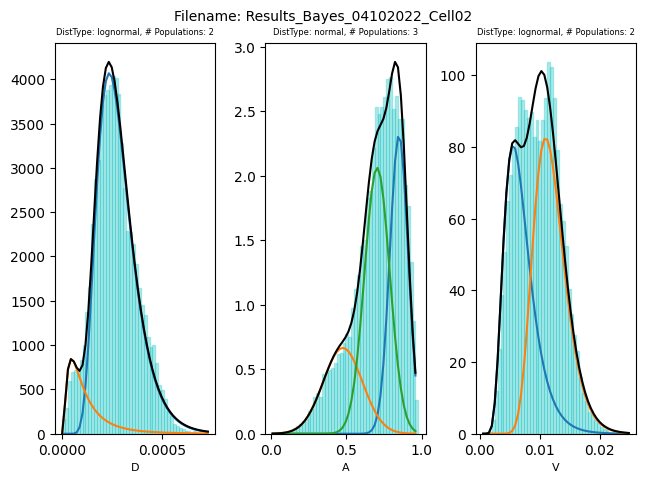

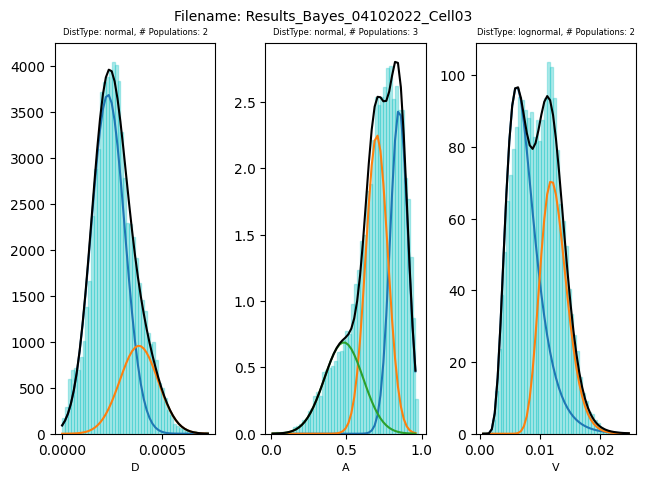

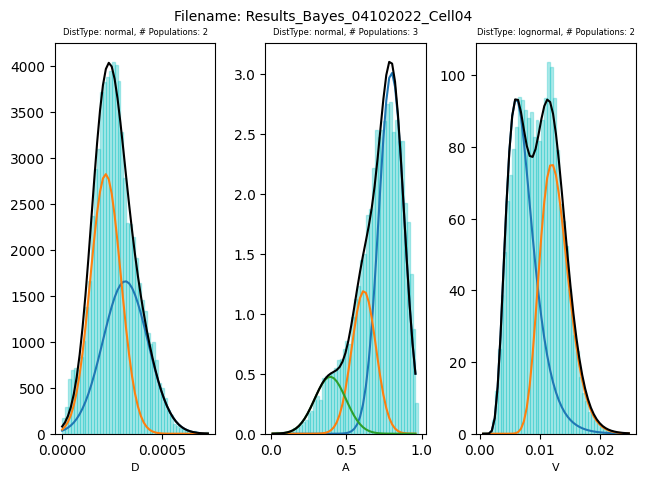

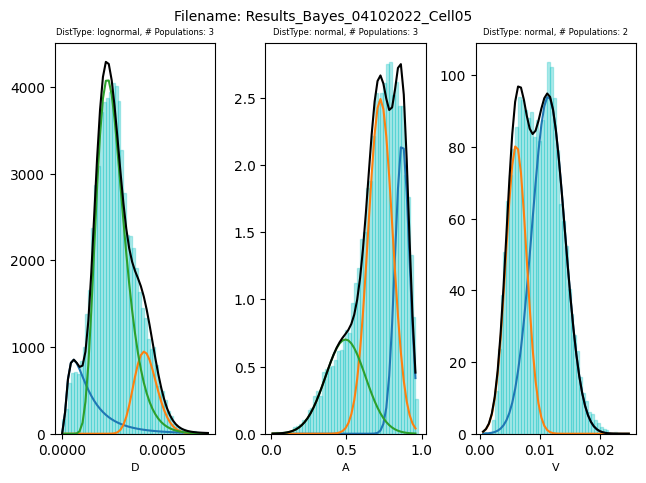

In [3]:
# Generating plots for inspection
showplots=True

pathBayesCells_Plots='OutputBayes/GMM_Multiple/Plots_GMM_Multiple/'

try: 
    os.mkdir(pathBayesCells_Plots)
except: 
    print('WARNING: The output path [%s] exists' %pathBayesCells_Plots)
    [f.unlink() for f in Path(pathBayesCells_Plots).glob("*") if f.is_file()] 


importDeconvolutionGMM.generateplots_TestGMM(pathBayesCells_Plots,BayesMat,parameters2decon,nbins,showplots)

In [4]:
# Run GMM based on table and plots for each parameter [D A V]

Sel_DistributionType=['normal','normal','lognormal']
Sel_numDist=[2,3,2]

BayesMatSel=importDeconvolutionGMM.applyGMMconstrained_dir(listdir,parameters2decon,Sel_DistributionType,Sel_numDist)


100%|██████████| 5/5 [00:01<00:00,  4.03it/s]


100%|██████████| 5/5 [00:01<00:00,  3.36it/s]


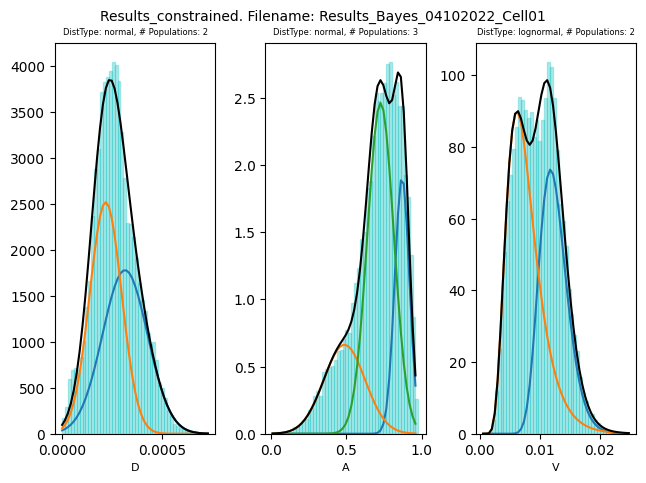

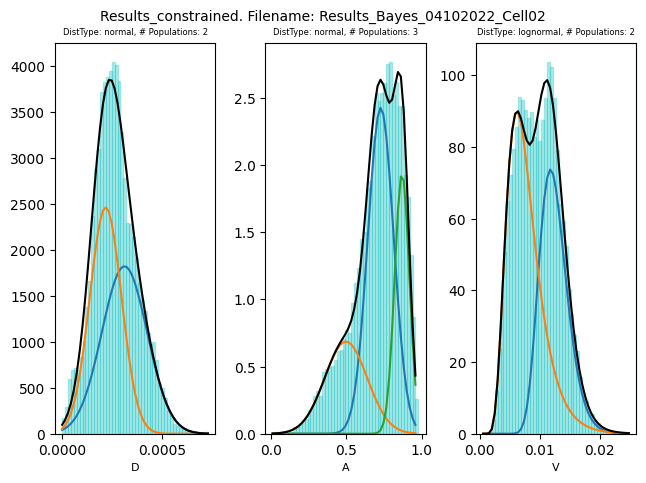

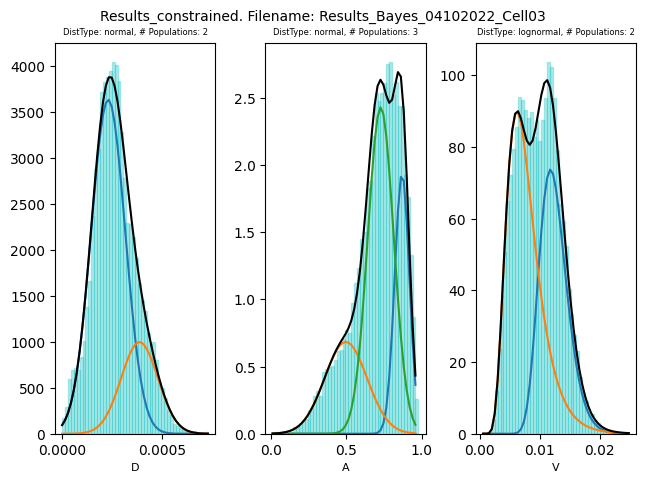

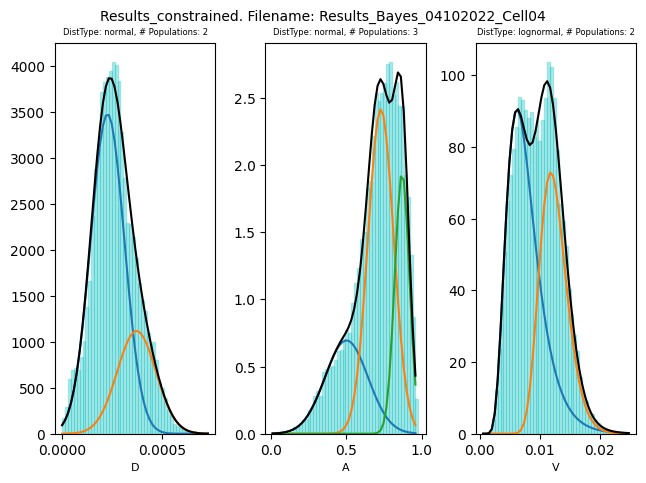

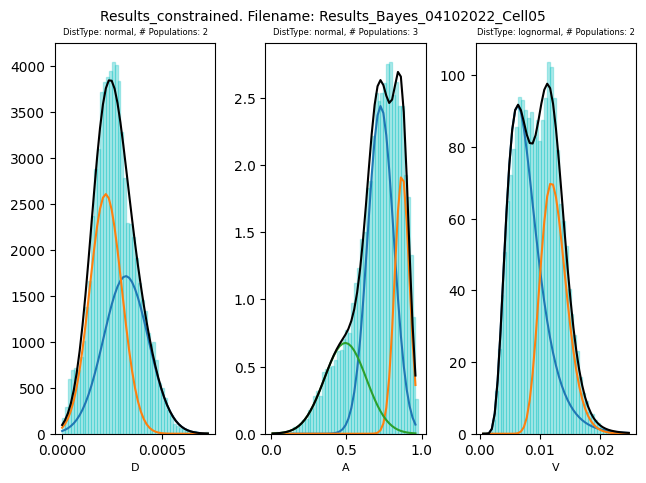

In [5]:
# Generate plots GMM constrained

pathGMMConstrained='OutputBayes/GMM_Constrained/'
try: 
    os.mkdir(pathGMMConstrained)
except: 
    print('WARNING: The output path [%s] exists' %pathGMMConstrained)
    [f.unlink() for f in Path(pathGMMConstrained).glob("*") if f.is_file()]

pathBayesCells_Plots_constrained='OutputBayes/GMM_Constrained/Plots_GMM_Constrained/'
showplots=True
try: 
    os.mkdir(pathBayesCells_Plots_constrained)
except: 
    print('WARNING: The output path [%s] exists' %pathBayesCells_Plots_constrained)
    [f.unlink() for f in Path(pathBayesCells_Plots_constrained).glob("*") if f.is_file()]


importDeconvolutionGMM.generateplots_GMMconstrained_fitout(pathBayesCells_Plots_constrained,BayesMatSel,parameters2decon,nbins,Sel_DistributionType,Sel_numDist,showplots)


100%|██████████| 5/5 [00:02<00:00,  2.42it/s]


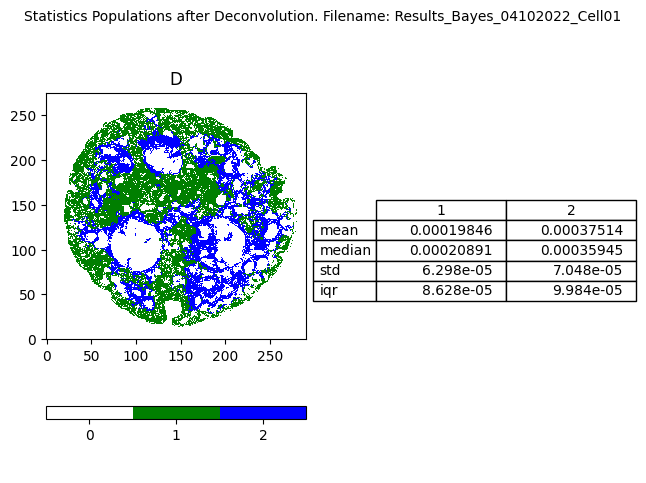

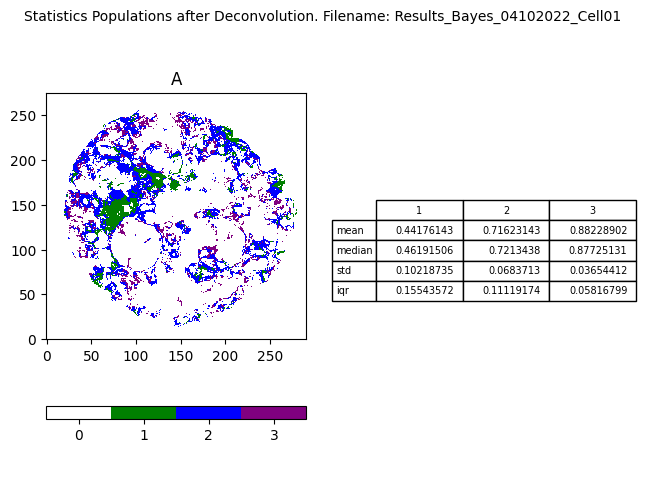

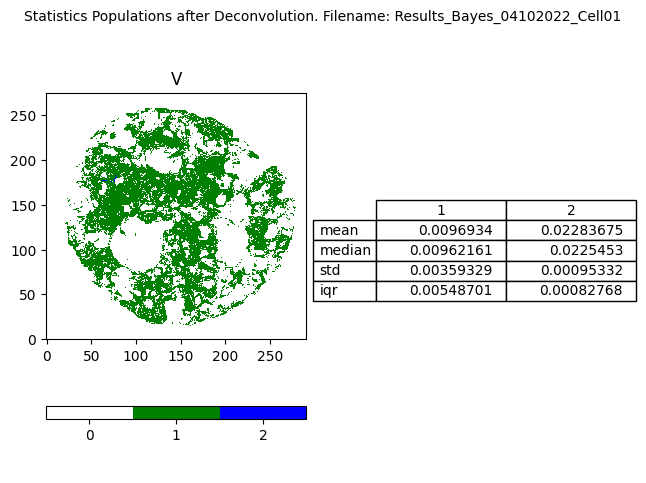

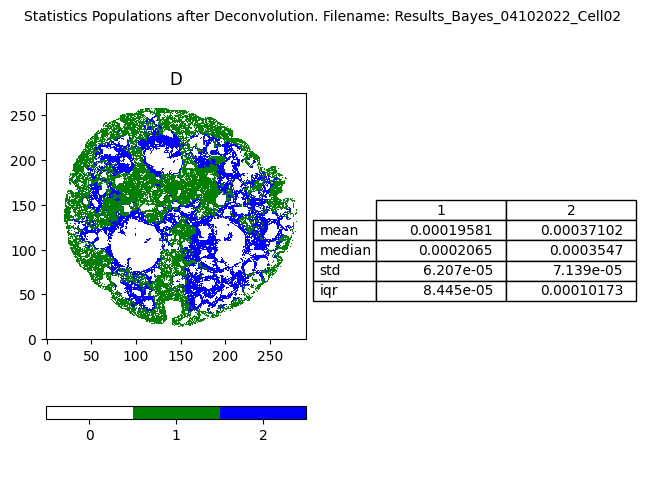

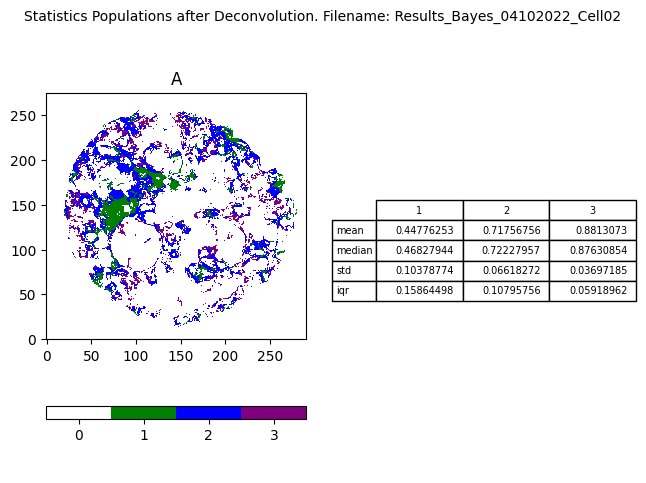

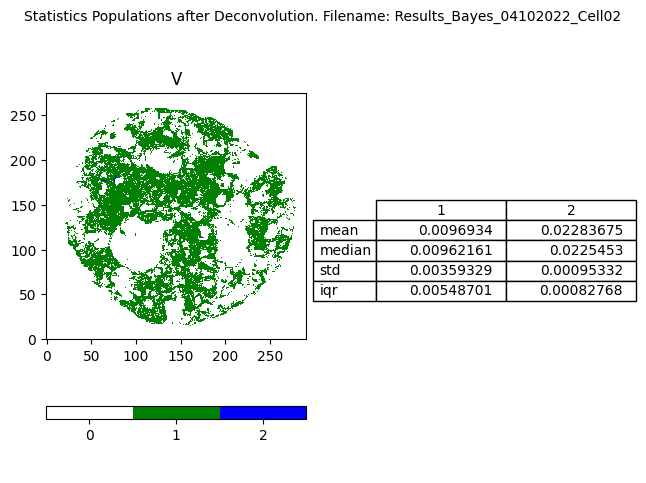

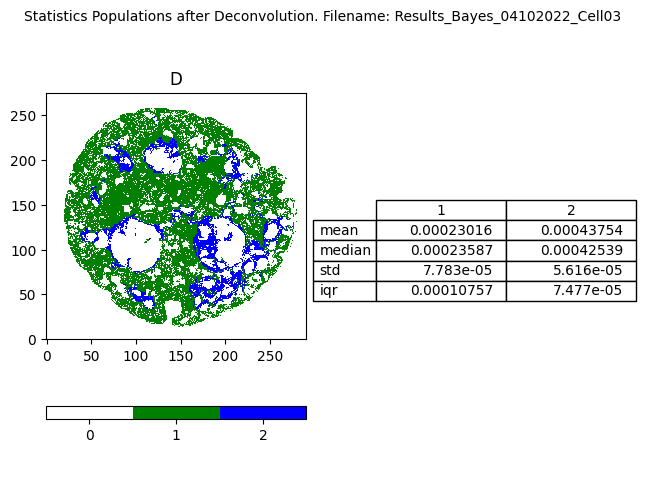

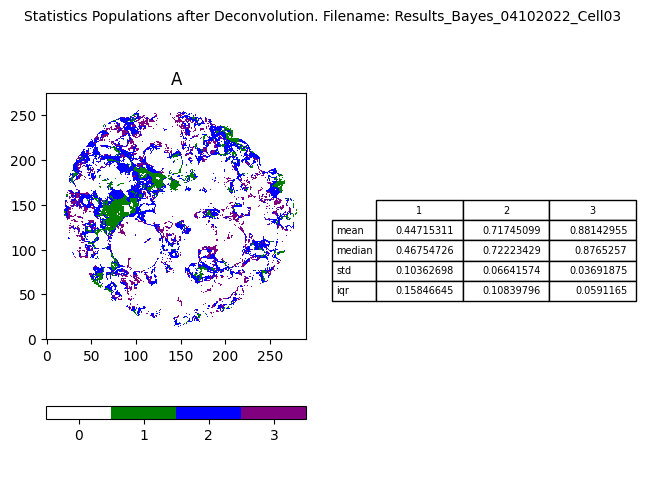

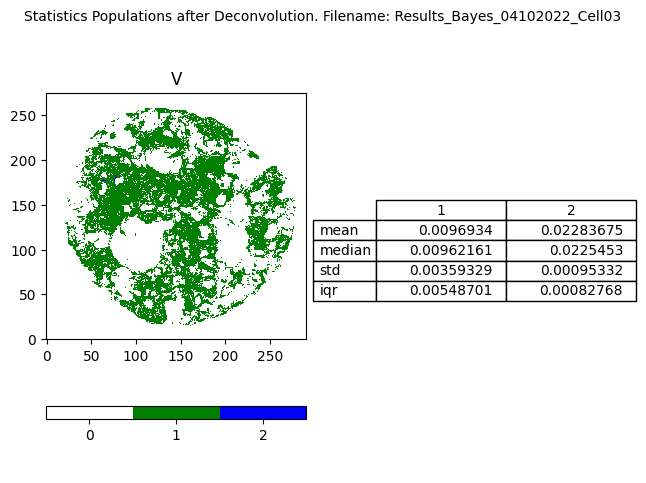

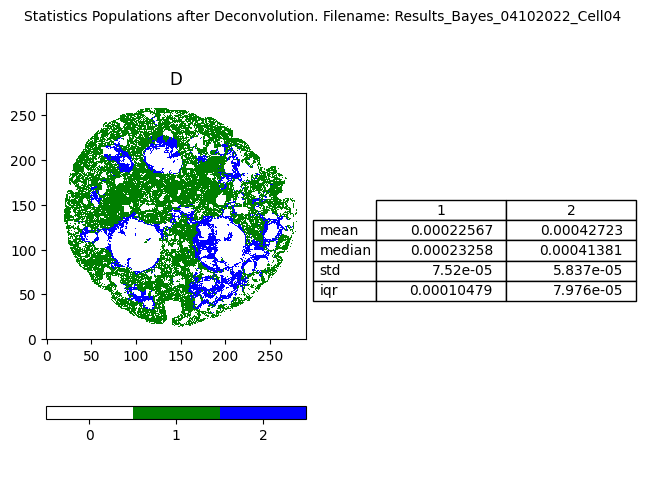

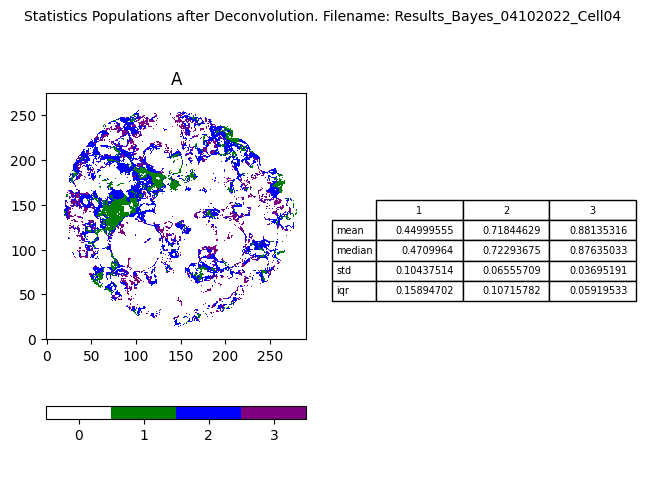

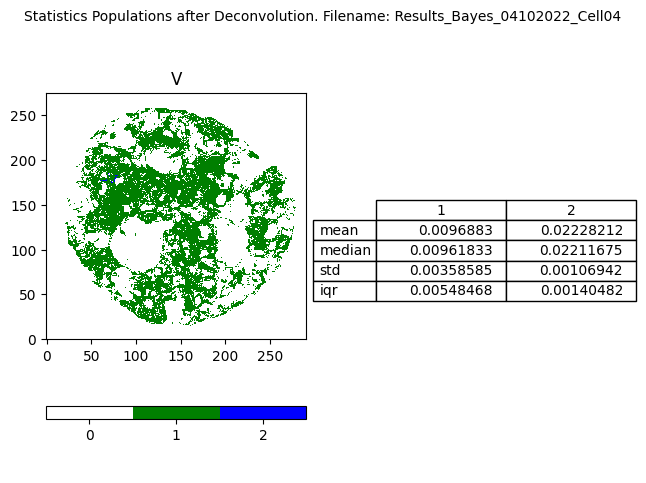

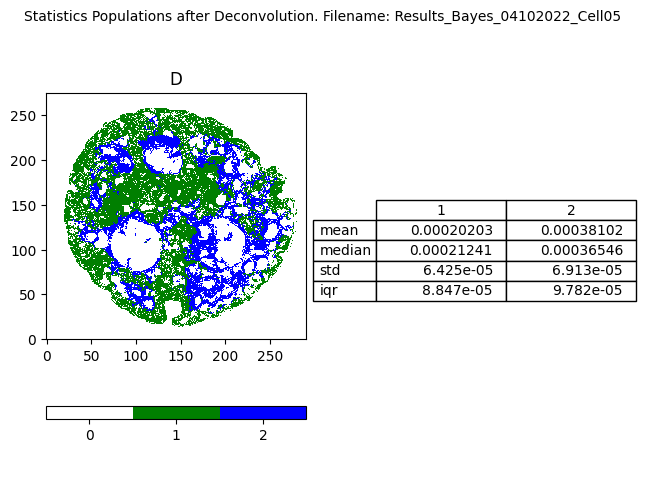

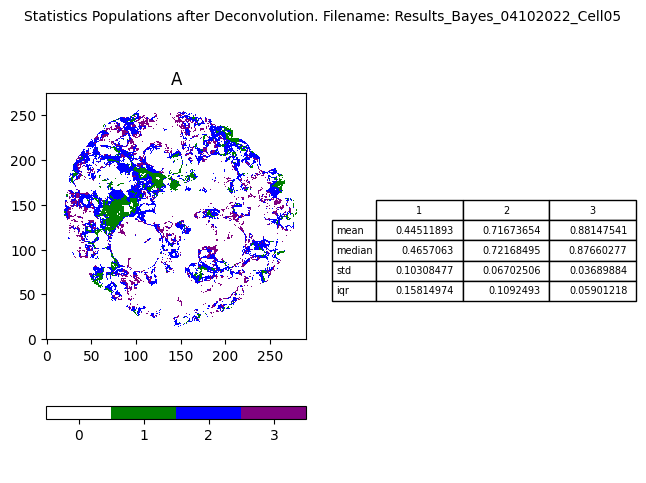

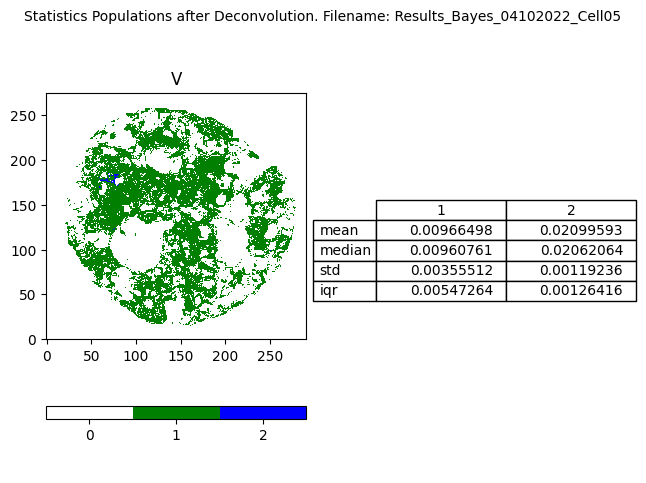

In [7]:
# Generate spatial mapping of population deconvolution

pathBayesCells_Populations_Plots='OutputBayes/GMM_Constrained/Populations_Plots_Stats/'
try: 
    os.mkdir(pathBayesCells_Populations_Plots)
except: 
    print('WARNING: The output path [%s] exists' %pathBayesCells_Populations_Plots)
    [f.unlink() for f in Path(pathBayesCells_Populations_Plots).glob("*") if f.is_file()]
    

showplots=True


for i in tqdm(range(len(BayesMatSel))):
    for j in range(len(parameters2decon)):
        try: 
            importDeconvolutionGMM.generate_plots_stats_decon(BayesMatSel[i],parameters2decon[j],pathBayesCells_Populations_Plots,showplots)
        except:
            filename_without_ext = os.path.splitext(BayesMatSel[i]['filename'])[0]
            print('WARNING: Error generating population label plot: File: '+filename_without_ext+' Parameter: '+parameters2decon[j])
